###Marzieh Mohammadi Kokaneh
###C0898396


##Given Task
The aim of this assignment is to process and clean the dataset, generate visualizations, and derive insights from the Algerian forest fire dataset by analyzing the Fire Weather Index (FWI) using the dataset : Algerian_forest_fires_cleaned.csv

This analysis will involve utilizing multiple linear regression,
polynomial regression, and regularization models.

Additionally, the assignment will include performing cross-validation and hyperparameter tuning to evaluate the model's performance.

After developing the model, you will create pickle files and test the model on unseen data.


In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Load the data
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# Check data types
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [4]:
# Describe data and basic statistic
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### we can drop the "year" feature, all of the data point are on same year and this feature dose not any effect to target varaiable

In [5]:
df.drop("year", axis = 1, inplace = True)

In [6]:
# Checking the size of data :
df.shape

(243, 14)

In [7]:
# caheck some of data point
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
## Check for missing Values

df.isna().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [9]:
## Ceck for Duplicate Values

df.duplicated().sum()

0

### Checking Correlation Between Target Variable (FWI) and Other features
We can not simply use
```
corr = df.corr()
```
because of the data type of Classes feature (Object)
```
df.corr()
```
accept numerical valuse only , so we need to exclude that feature

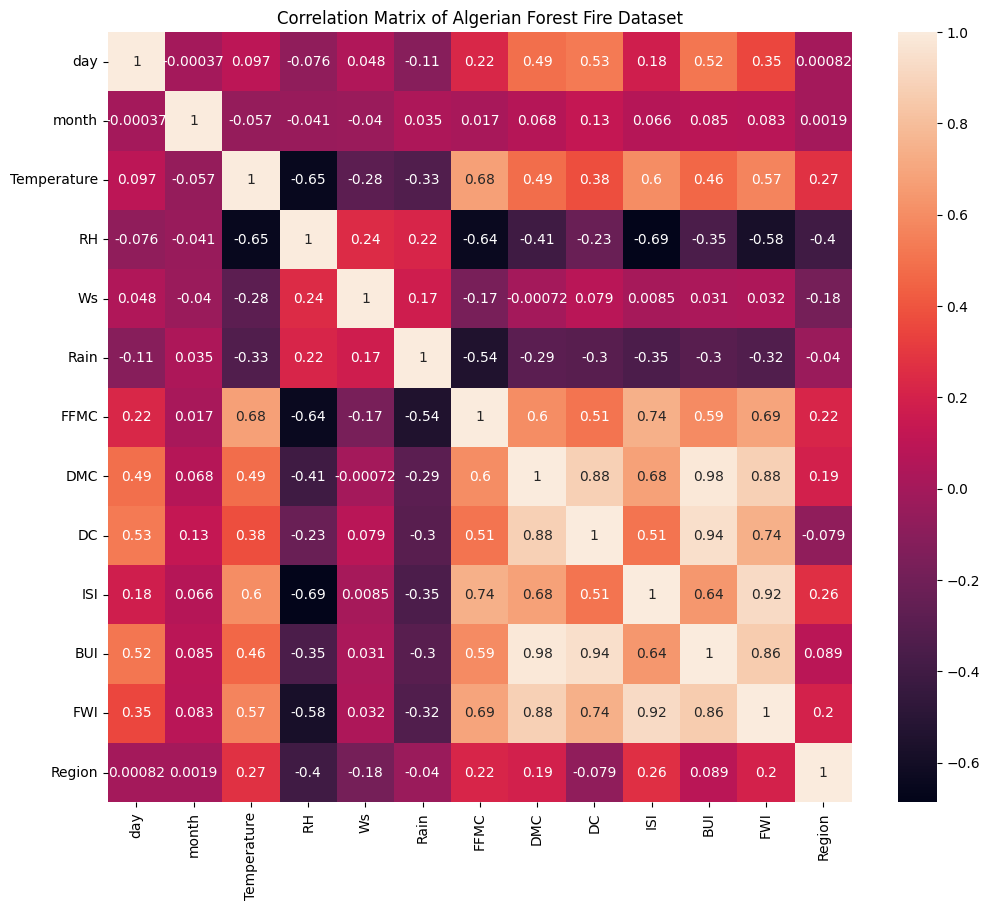

In [10]:
# Checking Correlation Between Target Variable (FWI) and Other features
corr = df.drop("Classes", axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix of Algerian Forest Fire Dataset')
plt.show()

In [11]:
# prompt: how we can know that how many different values are in one feature?  the "Classes" feture is an object

df['Classes'].value_counts()


Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

### I (personaly, I'm not sure if it correct or not) prefer to just encode the top two categories, becasue the most majority of the data point related to the them.

In [12]:
# Encoding Categorical feature using OneHotEncoding :


# Identify the top two categories
top_categories = df['Classes'].value_counts().nlargest(2).index.tolist()

# Perform one-hot encoding for only the top two
for category in top_categories:
    df[f'Classes_{category}'] = (df['Classes'] == category).astype(int)

# Drop the original 'Classes' column
df.drop(columns=['Classes'], inplace=True)


In [13]:
df.dtypes

day                      int64
month                    int64
Temperature              int64
RH                       int64
Ws                       int64
Rain                   float64
FFMC                   float64
DMC                    float64
DC                     float64
ISI                    float64
BUI                    float64
FWI                    float64
Region                   int64
Classes_fire             int64
Classes_not fire         int64
dtype: object

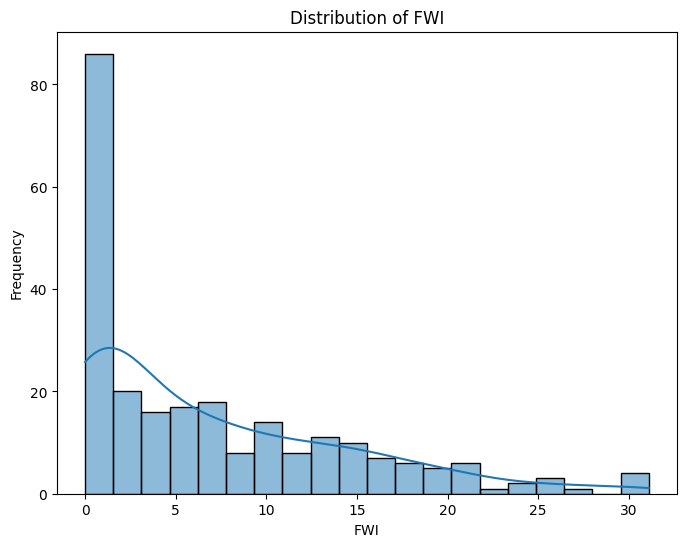

In [14]:
# Visualize the distribution of the target variable (FWI)
plt.figure(figsize=(8, 6))
sns.histplot(df['FWI'], bins=20, kde=True)
plt.title('Distribution of FWI')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

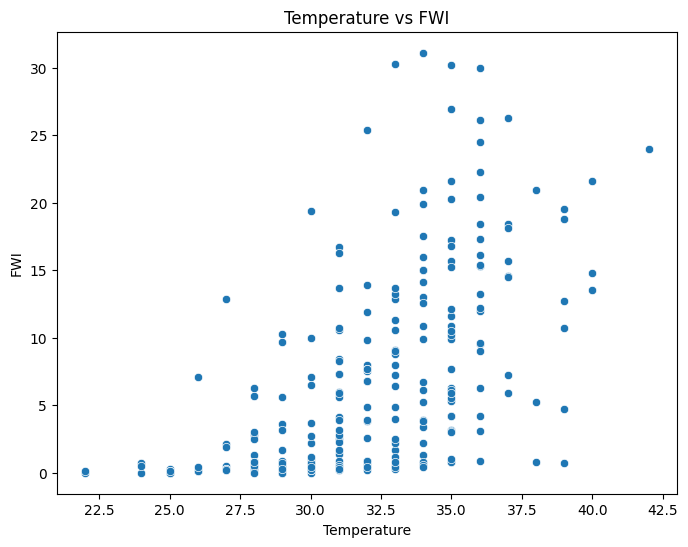

In [15]:
# scatter plot between 'Temperature' and 'FWI'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='FWI', data=df)
plt.title('Temperature vs FWI')
plt.xlabel('Temperature')
plt.ylabel('FWI')
plt.show()


##we can interprate this plot in this way:  by increasing the 'Temprature', the 'FWI' (Fire Weather Index) is increasing. Estimately, we can say the correlation is straight !

In [16]:
## Split Data into Train and Test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['FWI'])
y = df['FWI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate performance (mean squared error and R-squared)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression MSE:", mse_lin)
print("Linear Regression R-squared:", r2_lin)



Linear Regression MSE: 0.36712691904144545
Linear Regression R-squared: 0.9878869666917522


In [19]:
for i, col in enumerate(X.columns):
  print(f'{col}:{lin_reg.coef_[i]}')

day:0.010605346468286123
month:0.06242425490506855
Temperature:-0.01078941413542056
RH:-0.014621283217536956
Ws:-0.023319865846376086
Rain:0.01161838478559777
FFMC:-0.06588882825712966
DMC:-0.0347074688771893
DC:-0.019692598233112226
ISI:1.1586291206409187
BUI:0.3465650993884161
Region:-0.38972756638955364
Classes_fire   :1.3643043024392378
Classes_not fire   :0.6923924640824961


#Polynomial Regression

In [21]:
# Create polynomial features transformer
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Create polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Polynomial Regression
poly= LinearRegression()
poly.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly.predict(X_test_poly)

# Evaluate performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)



Polynomial Regression MSE: 0.6447869437774533
Polynomial Regression R-squared: 0.9787258157285441


#Regularization Models (Ridge, Lasso)

In [22]:
#Lasso Regression (Regularization)
lasso = Lasso()
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso= r2_score(y_test, y_pred_lasso)
print("Lasso MSE:", mse_lasso)
print("Lasso R-squared:", r2_lasso)

Lasso MSE: 1.288355990423331
Lasso R-squared: 0.9574918149134235


In [23]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)
print("Ridge MSE:", mse_ridge)
print("Ridge R-squared:", r2_ridge)

Ridge MSE: 0.3626812480570955
Ridge R-squared: 0.9880336477383275


## Tuning HyperParameters

In [24]:
# Hyperparameter tuning for Ridge
from sklearn.model_selection import  GridSearchCV
ridge_params = {'alpha': [0.1, 0.5, 1, 5, 10]}
ridge_grid = GridSearchCV(ridge_reg, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)


# Select the best model
best_model = ridge_grid.best_estimator_
best_params = ridge_grid.best_params_
best_score = ridge_grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'alpha': 10}
Best Score: -2.2872635836096524


In [25]:
#Running the ridge model with founded best parameters:
# Ridge Regression
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)
print("Ridge MSE:", mse_ridge)
print("Ridge R-squared:", r2_ridge)

Ridge MSE: 0.33683053883289654
Ridge R-squared: 0.9888865694001117


In [26]:
import pickle

# Save the models to pickle files
lin_result = pickle.dump(lin_reg, open('lin_reg.pkl', 'wb'))
pickle.dump(poly, open('poly.pkl', 'wb'))
pickle.dump(ridge_grid.best_estimator_, open('ridge.pkl', 'wb'))
pickle.dump(lasso, open('lasso.pkl', 'wb'))


# Load the models from pickle files
lin_reg_loaded = pickle.load(open('lin_reg.pkl', 'rb'))
poly_loaded = pickle.load(open('poly.pkl', 'rb'))
ridge_loaded = pickle.load(open('ridge.pkl', 'rb'))
lasso_loaded = pickle.load(open('lasso.pkl', 'rb'))

# Test the models on unseen data
y_pred_lin_reg2 = lin_reg_loaded.predict(X_test)
y_pred_poly2 = poly_loaded.predict(X_test_poly)
y_pred_ridge2 = ridge_loaded.predict(X_test)
y_pred_lasso2 = lasso_loaded.predict(X_test)

In [27]:
# Evaluate the performance of these models on the unseen data

lin_mse_2= mean_squared_error(y_test, y_pred_lin_reg2)
lin_r2_2 = r2_score(y_test, y_pred_lin_reg2)

poly_mse_2 = mean_squared_error(y_test, y_pred_poly2)
poly_r2_2 = r2_score(y_test, y_pred_poly2)

ridge_mse_2 = mean_squared_error(y_test, y_pred_ridge2)
ridge_r2_2 = r2_score(y_test, y_pred_ridge2)

lasso_mse_2 = mean_squared_error(y_test, y_pred_lasso2)
lasso_r2_2 = r2_score(y_test, y_pred_lasso2)

unseen_results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [lin_mse_2, poly_mse_2, ridge_mse_2, lasso_mse_2],
    'R2 Score': [lin_r2_2, poly_r2_2, ridge_r2_2, lasso_r2_2]
}

unseen_results_df = pd.DataFrame(unseen_results)
print("Unseen Data Model Performance Results")
print(unseen_results_df)

Unseen Data Model Performance Results
                   Model       MSE  R2 Score
0      Linear Regression  0.367127  0.987887
1  Polynomial Regression  0.644787  0.978726
2       Ridge Regression  0.336831  0.988887
3       Lasso Regression  1.288356  0.957492


I wanna add Decision tree classifier as well

### Let's say, we want to make a DecisionTree model to see the performance

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_reg= DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred_dt= dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE_DecisionTreeRegressor:",mse_dt)

r2_dt = r2_score(y_test, y_pred_dt)
print("R2_Score_DecisionTreeRegressor:",r2_dt)

MSE_DecisionTreeRegressor: 2.718775510204081
R2_Score_DecisionTreeRegressor: 0.9102963672652058


[Text(0.6062905259365994, 0.9642857142857143, 'x[9] <= 6.85\nsquared_error = 60.671\nsamples = 194\nvalue = 7.42'),
 Text(0.3534311959654179, 0.8928571428571429, 'x[6] <= 82.65\nsquared_error = 10.983\nsamples = 133\nvalue = 2.989'),
 Text(0.20046829971181557, 0.8214285714285714, 'x[9] <= 2.15\nsquared_error = 1.633\nsamples = 93\nvalue = 1.171'),
 Text(0.13436599423631124, 0.75, 'x[10] <= 15.05\nsquared_error = 0.444\nsamples = 72\nvalue = 0.617'),
 Text(0.07853025936599424, 0.6785714285714286, 'x[6] <= 66.7\nsquared_error = 0.108\nsamples = 68\nvalue = 0.482'),
 Text(0.03602305475504323, 0.6071428571428571, 'x[6] <= 51.25\nsquared_error = 0.027\nsamples = 39\nvalue = 0.244'),
 Text(0.011527377521613832, 0.5357142857142857, 'x[6] <= 44.95\nsquared_error = 0.004\nsamples = 15\nvalue = 0.067'),
 Text(0.005763688760806916, 0.4642857142857143, 'squared_error = 0.0\nsamples = 6\nvalue = 0.0'),
 Text(0.01729106628242075, 0.4642857142857143, 'x[9] <= 0.45\nsquared_error = 0.001\nsamples = 9\

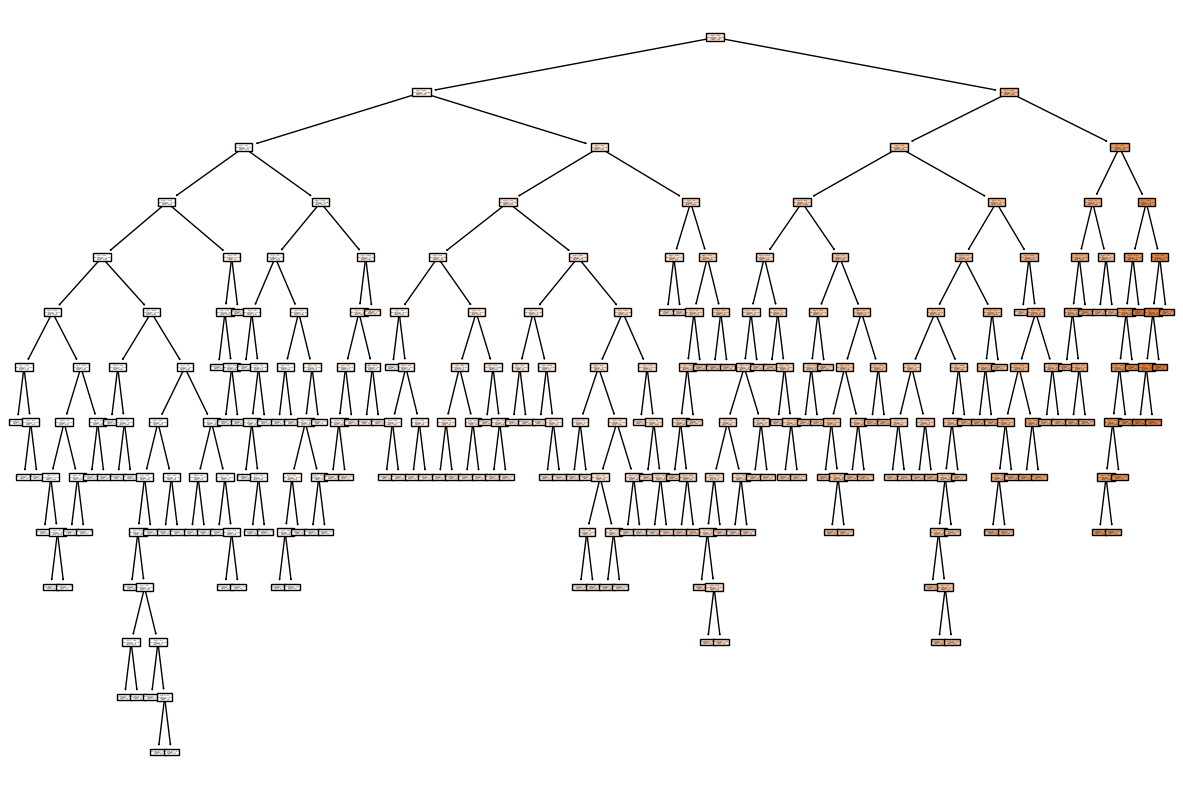

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_reg,filled=True)

In [37]:
parameter = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
            'max_depth':[5,10,12,15,20],
            'max_features':['auto','sqrt','log2']}

grid = GridSearchCV( dt_reg, param_grid=parameter, cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 12, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [38]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto'}

In [39]:
dt_reg_best_param = DecisionTreeRegressor (criterion= 'squared_error', max_depth=20, max_features= 'auto')

In [40]:
dt_reg_best_param.fit(X_train, y_train)
y_pred_dt_best= dt_reg_best_param.predict(X_test)
mse_dt_best = mean_squared_error(y_test, y_pred_dt)
print("MSE_DecisionTreeRegressor with Best Parameters:",mse_dt_best)

r2_dt_best = r2_score(y_test, y_pred_dt)
print("R2_Score_DecisionTreeRegressor with Best Parameters:",r2_dt_best)

MSE_DecisionTreeRegressor with Best Parameters: 2.718775510204081
R2_Score_DecisionTreeRegressor with Best Parameters: 0.9102963672652058


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
